In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import bisect, newton, toms748

In [106]:
# LINEAR CROSS INHIBITION:
def f0_equation_linci(f0, pis, qs, l, lci, permutation):
    # as a solution of a second degree poly is involved, choose branch by setting +1 or -1
    Nsites = len(pis)
    rs = [1/q for q in qs]
    sumval = 0.0
    for i in range(Nsites):
        sumval += (rs[i] + permutation[i]*np.sqrt(((l+lci)*f0 - rs[i] - lci)**2 - 4*lci*(1-l)*pis[i]*f0))
    sumval = sumval/(2*lci)
    return 1 - f0 + (Nsites*(l+lci)*f0-Nsites*lci)/(2*lci) - sumval

def f0_eq_sqrt_zeros(pi, q, l, lci):
    r = 1/q
    a = (l + lci)**2
    b = (-2*(l+lci)*(r+lci) - 4*lci*(1-l)*pi)
    c = (r+lci)**2
    arrel = np.sqrt(b**2 - 4*a*c)
    return (-b+arrel)/(2*a), (-b-arrel)/(2*a)

def falpha_linci(f0, pi, q, l, lci):
    r = 1/q
    # rootval = np.sqrt(((l+lci)*f0 - r - lci)**2 - 4*lci*(1-l)*pi*f0)
    a = lci
    b = -r-lci+(l+lci)*f0
    c = f0*(1-l)*pi
    arrel = np.sqrt(b**2 - 4*a*c)
    return (-b+arrel)/(2*a), (-b-arrel)/(2*a)
    

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_38557/3654034362.py:8: RuntimeWarning: invalid value encountered in sqrt
  sumval += (rs[i] + permutation[i]*np.sqrt(((l+lci)*f0 - rs[i] - lci)**2 - 4*lci*(1-l)*pis[i]*f0))


[0.3929690394231026, 0.18556057786706026, 0.16636348629769296]
[0.39296903942376715, 0.18556057786563657, 0.16636348629750547]


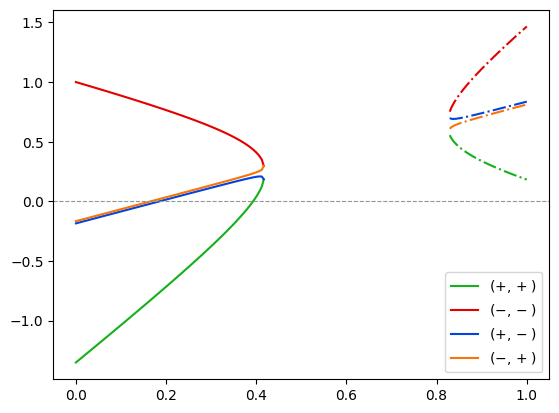

In [103]:
pis, qs, l, lci = [0.1, 0.1], [9.0, 10.0], 0.6, 0.6
# pis, qs, l, lci = [0.2, 0.2], [9.0, 10.0], 0.2, 0.2

f0s1 = f0_eq_sqrt_zeros(pis[0], qs[0], l, lci)
f0s2 = f0_eq_sqrt_zeros(pis[1], qs[1], l, lci)
f0sProb = sorted(f0s1 + f0s2)

f0s_lower = np.linspace(0.0, f0sProb[0], 100)
f0s_upper = np.linspace(f0sProb[-1], 1.0, 100)

permutation = [+1, +1]
eqvals_pp_lower = f0_equation_linci(f0s_lower, pis, qs, l, lci, permutation)
eqvals_pp_upper = f0_equation_linci(f0s_upper, pis, qs, l, lci, permutation)

permutation = [-1, -1]
eqvals_mm_lower = f0_equation_linci(f0s_lower, pis, qs, l, lci, permutation)
eqvals_mm_upper = f0_equation_linci(f0s_upper, pis, qs, l, lci, permutation)

permutation = [+1, -1]
eqvals_pm_lower = f0_equation_linci(f0s_lower, pis, qs, l, lci, permutation)
eqvals_pm_upper = f0_equation_linci(f0s_upper, pis, qs, l, lci, permutation)

permutation = [-1, +1]
eqvals_mp_lower = f0_equation_linci(f0s_lower, pis, qs, l, lci, permutation)
eqvals_mp_upper = f0_equation_linci(f0s_upper, pis, qs, l, lci, permutation)

fig, ax = plt.subplots()
ax.plot(f0s_lower, eqvals_pp_lower, color='xkcd:green', label='$(+,+)$')
ax.plot(f0s_upper, eqvals_pp_upper, color='xkcd:green', ls='-.')

ax.plot(f0s_lower, eqvals_mm_lower, color='xkcd:red', label='$(-,-)$')
ax.plot(f0s_upper, eqvals_mm_upper, color='xkcd:red', ls='-.')

ax.plot(f0s_lower, eqvals_pm_lower, color='xkcd:blue', label='$(+,-)$')
ax.plot(f0s_upper, eqvals_pm_upper, color='xkcd:blue', ls='-.')

ax.plot(f0s_lower, eqvals_mp_lower, color='xkcd:orange', label='$(-,+)$')
ax.plot(f0s_upper, eqvals_mp_upper, color='xkcd:orange', ls='-.')

ax.legend()

ax.axhline(0, 0,1, ls='--', lw=0.8, color='xkcd:gray')

roots = []
roots_toms = []
roots_secant = []
for permutation in [[+1, +1], [+1, -1], [-1, +1], [-1, -1]]:
    args = [pis, qs, l, lci, permutation]
    if f0_equation_linci(0.0, *args)*f0_equation_linci(f0sProb[0], *args) < 0:
        a = bisect(f0_equation_linci, 0.0, f0sProb[0], args=(pis, qs, l, lci, permutation))
        aa = toms748(f0_equation_linci, 0.0, f0sProb[0], args=(pis, qs, l, lci, permutation))
        roots.append(a), roots_toms.append(aa)
        # aaa = newton(f0_equation_linci, (0.0+f0sProb[0])/2, args=(pis, qs, l, lci, permutation))
        # roots_secant.append(aaa)

print(roots)
print(roots_toms)

In [110]:
fis = [[], []]
for f0 in roots:
    for i in range(len(pis)):
        fisAux = list(falpha_linci(f0, pis[i], qs[i], l, lci))
        fis[i].extend(fisAux)

for i,f0 in enumerate(roots):
    for j in range(len(pis)):
        sol = [f0, fis[0][i*2 + j], fis[1][i*2 + j]]
        print(sol)

[0.3929690394231026, 0.3164637304137582, 0.2905672301666127]
[0.3929690394231026, 0.08278337592522174, 0.0901613576538488]
[0.18556057786706026, 0.7985730161805377, 0.7796791049815621]
[0.18556057786706026, 0.015491013270526831, 0.015866405950984014]
[0.16636348629769296, 0.8392428493670109, 0.8204211504793304]
[0.16636348629769296, 0.013215363222788315, 0.013518543591950299]


In [109]:
fis

[[0.3164637304137582,
  0.08278337592522174,
  0.7985730161805377,
  0.015491013270526831,
  0.8392428493670109,
  0.013215363222788315],
 [0.2905672301666127,
  0.0901613576538488,
  0.7796791049815621,
  0.015866405950984014,
  0.8204211504793304,
  0.013518543591950299]]

## This is wrong:

In [88]:
# LINEAR CROSS INHIBITION:
def f0_equation_linci(f0, pis, qs, l, lci, branch):
    # as a solution of a second degree poly is involved, choose branch by setting +1 or -1
    Nsites = len(pis)
    rs = [1/q for q in qs]
    sumval = 0.0
    for i in range(Nsites):
        sumval += (rs[i] + branch*np.sqrt(((l+lci)*f0 - rs[i] - lci)**2 - 4*lci*(1-l)*pis[i]*f0))
    sumval = sumval/(2*lci)
    return 1 - f0 + (Nsites*(l+lci)*f0-Nsites*lci)/(2*lci) - sumval


def f0_eq_sqrt_zeros(pi, q, l, lci):
    r = 1/q
    a = (l + lci)**2
    b = (-2*(l+lci)*(r+lci) - 4*lci*(1-l)*pi)
    c = (r+lci)**2
    arrel = np.sqrt(b**2 - 4*a*c)
    return (-b+arrel)/(2*a), (-b-arrel)/(2*a)

In [89]:
# pis, qs, l, lci = [0.2, 0.2], [9.0, 10.0], 0.2, 0.2 # no root?
pis, qs, l, lci = [0.1, 0.1], [9.0, 10.0], 0.6, 0.6
f0s1 = f0_eq_sqrt_zeros(pis[0], qs[0], l, lci)
f0s2 = f0_eq_sqrt_zeros(pis[1], qs[1], l, lci)
f0sProb = sorted(f0s1 + f0s2)

f0s_lower = np.linspace(0.0, f0sProb[0], 100)
f0s_upper = np.linspace(f0sProb[-1], 1.0, 100)

# f0s = np.concatenate([f0s_lower, f0s_upper])
# eqvals_plus = f0_equation_linci(f0s, pis, qs, l, lci, branch=1)
# eqvals_min = f0_equation_linci(f0s, pis, qs, l, lci, branch=-1)

eqvalsPlus_lower = f0_equation_linci(f0s_lower, pis, qs, l, lci, branch=1)
eqvalsPlus_upper = f0_equation_linci(f0s_upper, pis, qs, l, lci, branch=1)
eqvalsMinus_lower = f0_equation_linci(f0s_lower, pis, qs, l, lci, branch=-1)
eqvalsMinus_upper = f0_equation_linci(f0s_upper, pis, qs, l, lci, branch=-1)

# a = bisect(f0_equation_linci, 0.0, f0sProb[0], args=(pis, qs, l, lci, -1))

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_38557/2605541091.py:8: RuntimeWarning: invalid value encountered in sqrt
  sumval += (rs[i] + branch*np.sqrt(((l+lci)*f0 - rs[i] - lci)**2 - 4*lci*(1-l)*pis[i]*f0))


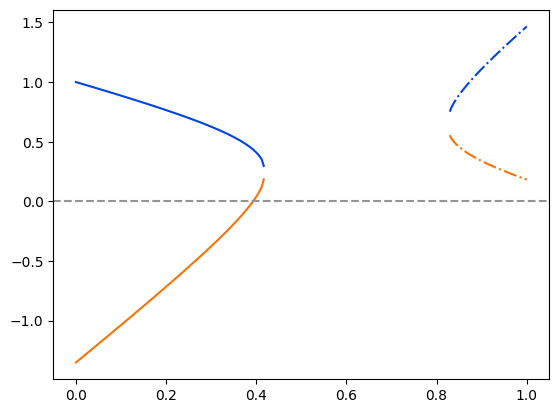

In [90]:
fig, ax = plt.subplots()
# ax.plot(f0s, eqvals_min)
# ax.plot(f0s, eqvals_plus)
ax.plot(f0s_lower, eqvalsMinus_lower, color='xkcd:blue')
ax.plot(f0s_upper, eqvalsMinus_upper, color='xkcd:blue', ls='-.')

ax.plot(f0s_lower, eqvalsPlus_lower, color='xkcd:orange')
ax.plot(f0s_upper, eqvalsPlus_upper, color='xkcd:orange', ls='-.')


ax.axhline(0, 0,1, ls='--', color='xkcd:gray')
# ax.axvline(a)

In [69]:
f0s_lower[-5:]

array([0.26697899, 0.2697893 , 0.2725996 , 0.27540991, 0.27822021])

In [77]:
f0_equation_linci(0.27525656456856995, pis, qs, l, lci, -1)

-4.0007921619435045